In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import os
from pathlib import Path
from selenium import webdriver
import os
import time
from datetime import datetime as dt
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date
from webdriver_manager.chrome import ChromeDriverManager
import requests



In [4]:
ticker_list = ['PETR4']

option = webdriver.ChromeOptions()
# option.add_argument("--headless")
driver = webdriver.Chrome(ChromeDriverManager().install(),  options=option)


In [94]:
tickers = ['BBDC4', 'PETR4', 'VALE3', 'ITUB4', 'BBDC4', 'B3SA3', 'ABEV3', 'JBSS3', 'BBAS3', 'WEGE3', 'ITSA4']

df = pd.DataFrame()

for ticker in tickers:

    print('Collecting data of ticker {}...'.format(ticker))

    option = webdriver.ChromeOptions()
    # option.add_argument("--headless")
    driver = webdriver.Chrome(ChromeDriverManager().install(),  options=option)

    # FUNDAMENTUS PAGE
    driver.get(
        f"https://www.fundamentus.com.br/resultados_trimestrais.php?papel={ticker}&tipo=1"
    )

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    rows = soup.find('table', {'id': 'fd-table-1'}).find("tbody").find_all("tr")

    for row in rows:
        cells = row.find_all("td")
        date = cells[0].get_text()
        cvm_link = cells[1].find('a', href=True)['href']

        # CVM PAGE
        driver.get(cvm_link)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        start_text = '\n//<![CDATA[\nwindow.frames[0].location=\''
        end_test = '\';//]]>\n"'
        table_link = soup.find_all('script')[-1].string[len(start_text):-len(end_test)+1]
        driver.get('https://www.rad.cvm.gov.br/ENET/' + table_link)

        time.sleep(0.5)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        rows_2 = soup.find('table', {'id': 'ctl00_cphPopUp_tbDados'}).find("tbody").find_all("tr")

        for i, row_2 in enumerate(rows_2):
            cells = row_2.find_all("td")
            if i==0:
                period = cells[2]
            else:
                register = {}
                register['ticker'] = ticker
                register['date'] = date
                register['cvm_period'] = period.get_text().strip()
                register['id'] = cells[0].get_text().strip()
                register['description'] = cells[1].get_text().strip()
                register['value'] = cells[2].get_text().strip()

                df = df.append([register])

    driver.close()

WebDriverException: Message: chrome not reachable
  (Session info: chrome=103.0.5060.114)


In [93]:
df['date'] = pd.to_datetime(df['date'])
df['value'] = pd.to_numeric(df['value'].str.replace('.', '').str.replace(',', '.'))
df = df.sort_values(['ticker', 'date'], ascending=[True, False])

df.to_csv('dre_consolidada.csv')

In [90]:
df_petr = df[(df['description'].str.contains('ON')) & (df['id'] == '3.99.01.01') & (df['ticker'] == 'PETR4')]
df_petr

,ticker,date,cvm_period,id,description,value
0,PETR4,2022-03-31,01/01/2022 a 31/03/2022,3.99.01.01,ON,3.42000
0,PETR4,2021-12-31,01/01/2021 a 31/12/2021,3.99.01.01,ON,8.18000
0,PETR4,2021-09-30,01/07/2021 a 30/09/2021,3.99.01.01,ON,2.39000
0,PETR4,2021-06-30,01/04/2021 a 30/06/2021,3.99.01.01,ON,3.28000
0,PETR4,2021-03-31,01/01/2021 a 31/03/2021,3.99.01.01,ON,0.09000
0,PETR4,2020-12-31,01/01/2020 a 31/12/2020,3.99.01.01,ON,0.54000
0,PETR4,2020-09-30,01/07/2020 a 30/09/2020,3.99.01.01,ON,-0.12000
0,PETR4,2020-06-30,01/04/2020 a 30/06/2020,3.99.01.01,ON,-0.21000
0,PETR4,2020-03-31,01/01/2020 a 31/03/2020,3.99.01.01,ON,-3.72000
0,PETR4,2019-12-31,01/01/2019 a 31/12/2019,3.99.01.01,ON,3.08000


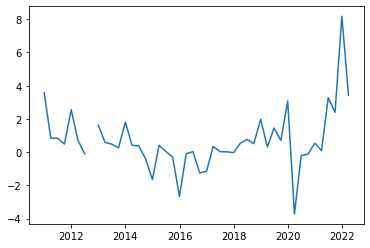

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_petr['date'], df_petr['value'])

In [69]:
df[(df['description'].str.contains('ON'))].iloc[:,3].str.strip().iloc[0]

'3.99.01.01'

In [ ]:
df[]

In [57]:

df['value'] == '\xa0'

0    False
0    False
0    False
0    False
0    False
     ...  
0     True
0     True
0     True
0    False
0    False
Name: value, Length: 8614, dtype: bool

In [ ]:
for i, row_2 in enumerate(rows_2):
    cells = row_2.find_all("td")
    if i==0:
        period = cells[2]
    else:
        register = {}
        register['period'] = period
        register['id'] = cells[0]
        register['description'] = cells[1]
        register['value'] = cells[2]



    
    

In [7]:
for i, row_2 in enumerate(rows_2):
        cells = row_2.find_all("td")
        print(cells[3].get_text())

 Descrição 
 Receita de Venda de Bens e/ou Serviços 
 Custo dos Bens e/ou Serviços Vendidos 
 Resultado Bruto 
 Despesas/Receitas Operacionais 
 Despesas com Vendas 
 Despesas Gerais e Administrativas 
 Perdas pela Não Recuperabilidade de Ativos 
 Outras Receitas Operacionais 
 Outras Despesas Operacionais 
 Tributárias 
 Custo com Pesquisa e Desenvolvimento Tecnológico 
 Custo Exploratório para Extração de Petróleo e Gás 
 Participação nos Lucros ou Resultados 
 Outras Despesas/Receitas Operacionais Líquidas 
 Baixa de gastos adicionais capitalizados indevidamente 
 Reversão/Perdas no valor de recuperação de ativos - Impairment 
 Resultado de Equivalência Patrimonial 
 Resultado Antes do Resultado Financeiro e dos Tributos 
 Resultado Financeiro 
 Receitas Financeiras 
 Receitas Financeiras 
 Variações Monetárias e Cambiais Líquidas 
 Despesas Financeiras 
 Despesas Financeiras 
 Variações Monetárias e Cambiais Líquidas 
 Resultado Antes dos Tributos sobre o Lucro 
 Imposto de Renda e

In [4]:


    # driver.get(html)
    # print(html)
    # soup = BeautifulSoup(html, 'html.parser')
    # rows_2 = soup.find('table', {'id': 'ctl00_cphPopUp_tbDados'}).find("tbody").find_all("tr")
    # for row_2 in rows_2:
    #     cells = row_2.find_all("td")
    #     print(cells)

In [10]:
for row_2 in rows_2:
    cells = row_2.find_all("td")
    print(cells[2].get_text())

01/01/2021  a  31/12/2021 
 452.668.000 
 -233.031.000 
 219.637.000 
 -8.806.000 
 -22.806.000 
 -6.340.000 
 
 
 11.913.000 
 -2.180.000 
 -3.033.000 
 -3.731.000 
 
 3.967.000 
 
 16.890.000 
 8.427.000 
 210.831.000 
 -59.256.000 
 4.458.000 
 4.458.000 
 
 -63.714.000 
 -27.636.000 
 -36.078.000 
 151.575.000 
 -44.311.000 
 -22.667.000 
 -21.644.000 
 107.264.000 
 
 
 
 107.264.000 
 106.668.000 
 596.000 
 
 
 8,18000 
 8,18000 
 
 8,18000 
 8,18000 


In [5]:
"frmDemonstracaoFinanceiraITR.aspx?Informacao=2&Demonstracao=4&Periodo=0&Grupo=DFs+Consolidadas&Quadro=Demonstra%c3%a7%c3%a3o+do+Resultado&NomeTipoDocumento=DFP&Empresa=PETROLEO BRASILEIRO S.A. PETROBRAS&DataReferencia=2021-12-31&Versao=1&CodTipoDocumento=4&NumeroSequencialDocumento=112007&NumeroSequencialRegistroCvm=1763&CodigoTipoInstituicao=1&Hash=ZEruwYGAL8h38GYW0kibQej8m2itZfeU1HfeV34roHw"

'frmDemonstracaoFinanceiraITR.aspx?Informacao=2&Demonstracao=4&Periodo=0&Grupo=DFs+Consolidadas&Quadro=Demonstra%c3%a7%c3%a3o+do+Resultado&NomeTipoDocumento=DFP&Empresa=PETROLEO BRASILEIRO S.A. PETROBRAS&DataReferencia=2021-12-31&Versao=1&CodTipoDocumento=4&NumeroSequencialDocumento=112007&NumeroSequencialRegistroCvm=1763&CodigoTipoInstituicao=1&Hash=ZEruwYGAL8h38GYW0kibQej8m2itZfeU1HfeV34roHw'

In [5]:
soup

<html xmlns="http://www.w3.org/1999/xhtml"><head id="Head1"><link href="App_Themes/CVM/Calendar/Skins/CVM/Calendar.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Calendar/Skins/CVM/RadTimePicker.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Calendario.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/ComboBox/CVM/Styles.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/ComboBox/Skins/CVM/Styles.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/EditarConteudo.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Entrada.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Erro.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Estrutura.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Ferramentas.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Formulario.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Formular

In [14]:
'https://www.rad.cvm.gov.br/ENET/frmDemonstracaoFinanceiraITR.aspx?Informacao=2&Demonstracao=4&Periodo=0&Grupo=DFs+Consolidadas&Quadro=Demonstra%c3%a7%c3%a3o+do+Resultado&NomeTipoDocumento=DFP&Empresa=PETROLEO%20BRASILEIRO%20S.A.%20PETROBRAS&DataReferencia=2021-12-31&Versao=1&CodTipoDocumento=4&NumeroSequencialDocumento=112007&NumeroSequencialRegistroCvm=1763&CodigoTipoInstituicao=1&Hash=ZEruwYGAL8h38GYW0kibQej8m2itZfeU1HfeV34roHw'

'https://www.rad.cvm.gov.br/ENET/frmDemonstracaoFinanceiraITR.aspx?Informacao=2&Demonstracao=4&Periodo=0&Grupo=DFs+Consolidadas&Quadro=Demonstra%c3%a7%c3%a3o+do+Resultado&NomeTipoDocumento=DFP&Empresa=PETROLEO%20BRASILEIRO%20S.A.%20PETROBRAS&DataReferencia=2021-12-31&Versao=1&CodTipoDocumento=4&NumeroSequencialDocumento=112007&NumeroSequencialRegistroCvm=1763&CodigoTipoInstituicao=1&Hash=ZEruwYGAL8h38GYW0kibQej8m2itZfeU1HfeV34roHw'

In [13]:
table_link

'frmDemonstracaoFinanceiraITR.aspx?Informacao=2&Demonstracao=4&Periodo=0&Grupo=DFs+Consolidadas&Quadro=Demonstra%c3%a7%c3%a3o+do+Resultado&NomeTipoDocumento=DFP&Empresa=PETROLEO BRASILEIRO S.A. PETROBRAS&DataReferencia=2021-12-31&Versao=1&CodTipoDocumento=4&NumeroSequencialDocumento=112007&NumeroSequencialRegistroCvm=1763&CodigoTipoInstituicao=1&Hash=ZEruwYGAL8h38GYW0kibQej8m2itZfeU1HfeV34roH'

In [8]:
requests.get(table_link)

MissingSchema: Invalid URL 'rmDemonstracaoFinanceiraITR.aspx?Informacao=2&Demonstracao=4&Periodo=0&Grupo=DFs+Consolidadas&Quadro=Demonstra%c3%a7%c3%a3o+do+Resultado&NomeTipoDocumento=DFP&Empresa=PETROLEO BRASILEIRO S.A. PETROBRAS&DataReferencia=2021-12-31&Versao=1&CodTipoDocumento=4&NumeroSequencialDocumento=112007&NumeroSequencialRegistroCvm=1763&CodigoTipoInstituicao=1&Hash=ZEruwYGAL8h38GYW0kibQej8m2itZfeU1HfeV34roHw': No scheme supplied. Perhaps you meant http://rmDemonstracaoFinanceiraITR.aspx?Informacao=2&Demonstracao=4&Periodo=0&Grupo=DFs+Consolidadas&Quadro=Demonstra%c3%a7%c3%a3o+do+Resultado&NomeTipoDocumento=DFP&Empresa=PETROLEO BRASILEIRO S.A. PETROBRAS&DataReferencia=2021-12-31&Versao=1&CodTipoDocumento=4&NumeroSequencialDocumento=112007&NumeroSequencialRegistroCvm=1763&CodigoTipoInstituicao=1&Hash=ZEruwYGAL8h38GYW0kibQej8m2itZfeU1HfeV34roHw?

'frmDemonstracaoFinanceiraITR.aspx?Informacao=2&Demonstracao=4&Periodo=0&Grupo=DFs+Consolidadas&Quadro=Demonstra%c3%a7%c3%a3o+do+Resultado&NomeTipoDocumento=DFP&Empresa=PETROLEO BRASILEIRO S.A. PETROBRAS&DataReferencia=2021-12-31&Versao=1&CodTipoDocumento=4&NumeroSequencialDocumento=112007&NumeroSequencialRegistroCvm=1763&CodigoTipoInstituicao=1&Hash=ZEruwYGAL8h38GYW0kibQej8m2itZfeU1HfeV34roH'

In [ ]:
frmDemonstracaoFinanceiraITR.aspx?Informacao=2&Demonstracao=4&Periodo=0&Grupo=DFs+Consolidadas&Quadro=Demonstra%c3%a7%c3%a3o+do+Resultado&NomeTipoDocumento=ITR&Empresa=PETROLEO%20BRASILEIRO%20S.A.%20PETROBRAS&DataReferencia=2022-03-31&Versao=1&CodTipoDocumento=3&NumeroSequencialDocumento=114416&NumeroSequencialRegistroCvm=1763&CodigoTipoInstituicao=1&Hash=99YpNWQ7zLoyvd3bHT2PQ6Bwiet48hL3ZL60liyLOE

In [45]:
https://www.rad.cvm.gov.br/ENET/frmDemonstracaoFinanceiraITR.aspx?Informacao=2&Demonstracao=4&Periodo=0&Grupo=DFs+Consolidadas&Quadro=Demonstra%c3%a7%c3%a3o+do+Resultado&NomeTipoDocumento=ITR&Empresa=PETROLEO%20BRASILEIRO%20S.A.%20PETROBRAS&DataReferencia=2022-03-31&Versao=1&CodTipoDocumento=3&NumeroSequencialDocumento=114416&NumeroSequencialRegistroCvm=1763&CodigoTipoInstituicao=1&Hash=99YpNWQ7zLoyvd3bHT2PQ6Bwiet48hL3ZL60liyLOE

<html xmlns="http://www.w3.org/1999/xhtml"><head id="Head1"><link href="App_Themes/CVM/Calendar/Skins/CVM/Calendar.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Calendar/Skins/CVM/RadTimePicker.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Calendario.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/ComboBox/CVM/Styles.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/ComboBox/Skins/CVM/Styles.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/EditarConteudo.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Entrada.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Erro.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Estrutura.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Ferramentas.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Formulario.css" rel="stylesheet" type="text/css"/><link href="App_Themes/CVM/Formular

In [44]:
table = soup.find('table', {'id': 'ctl00_cphPopUp_tbDados'})
table